<a href="https://colab.research.google.com/github/RewinaB/peopleanalytics-regression-book/blob/master/EDA_using_Wage_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA on WAGE data

# Explanatory Data Analysis: EDA
Exploratory data analysis [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)


First we need to import some libraries:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#This is just to stop warning but it is often  a good thing to get warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  #if you want to use seaborn themes with matplotlib functions

## Data Preprocessing

Load your data using the pandas and then explore what the type of data you have is

In [2]:
df = pd.read_csv('wage.csv')
df.tail()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
930,52000.0,40,79,16,6,1,30,1,1,11.0,NaN
931,120200.0,40,102,13,10,3,31,1,0,8.0,6.0
932,53800.0,45,77,12,12,10,28,1,1,7.0,NaN
933,87300.0,44,109,12,12,12,28,1,0,NaN,11.0
934,100000.0,40,107,12,17,18,35,1,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


### Variable Type?
* Starting by counting the unique elements for each variable:

In [4]:
df.columns #returns the column labels of the DataFrame

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col, df[col].nunique())  #a for loop to see the unique elements that each variable (colomun) has:

wage 449
hours 37
IQ 80
educ 10
exper 22
tenure 23
age 11
married 2
black 2
meduc 19
feduc 18


In [6]:
# alternatively,
df.nunique() #is a method used to count the number of unique values in each column of a DataFrame df

wage       449
hours       37
IQ          80
educ        10
exper       22
tenure      23
age         11
married      2
black        2
meduc       19
feduc       18
dtype: int64

* apparantly *black* and *married* should be categorical variables and the rest of them be numerics.

* We can also  tabularize the variables of interest using value_counts() function from pandas.

In [8]:
for col in ['black', 'married']:
    print(df[col].value_counts())
  #This loop iterates through each column name in the list ['black', 'married']. For each column name col, it accesses the corresponding column in the DataFrame df (df[col]),
  #then applies the value_counts() method to count the occurrences of each unique value in that column, and finally prints the result.

0    815
1    120
Name: black, dtype: int64
1    835
0    100
Name: married, dtype: int64


Exercis: generate the same output as above using list comprehensions.


In [10]:
print(df[['black', 'married']].apply(pd.Series.value_counts))
#This one-liner achieves the same output as the loop above. It selects the specified columns ['black', 'married'] from the DataFrame df, applies the value_counts() method to each column,
#and returns a DataFrame where each column represents the counts of unique values in the corresponding original column.

   black  married
0    815      100
1    120      835


---

#### Defining the categorical and numeric variables:

In [11]:
categoricals =['black','married']
numerics     =['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age','meduc', 'feduc'] # one way/method

In [12]:
list(df.drop(['black','married'], axis=1).columns)

['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc', 'feduc']

Changing categorical type variables in to category:

In [13]:
for col in categoricals:
    df[col]=df[col].astype("category")

In [14]:
#another way:
columns_to_convert = ['black', 'married']

# Convert columns to categorical dtype
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Verify the changes
print(df.dtypes)


wage        float64
hours         int64
IQ            int64
educ          int64
exper         int64
tenure        int64
age           int64
married    category
black      category
meduc       float64
feduc       float64
dtype: object


Use apply and lambda for changing the type of variables in python

In [18]:
columns_to_convert = ['black', 'married']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype('category'))

----

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 67.9 KB


In [20]:
for col in numerics:
    df[col]=df[col].astype("float")
    # alternatively we could have used pd.to_numeric(df[col], errors='coerce').

In [21]:
# again, alternatively:
df[numerics]= df[numerics].apply(lambda x: x.astype("float"))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(9)
memory usage: 67.9 KB


In [24]:
df.describe().T  #.T attribute is used to transpose the DataFrame. Transposing a DataFrame means converting its rows into columns and vice versa.

,count,mean,std,min,25%,50%,75%,max
wage,935.0,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0
feduc,741.0,10.217274,3.300700,0.0,8.0,10.0,12.0,18.0


In [25]:
# hmmm? what about categorical variables? use include='all'
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
wage,935.0,NaN,NaN,NaN,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,NaN,NaN,NaN,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,NaN,NaN,NaN,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,NaN,NaN,NaN,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,NaN,NaN,NaN,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,NaN,NaN,NaN,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,NaN,NaN,NaN,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,2.0,1.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,935.0,2.0,0.0,815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meduc,857.0,NaN,NaN,NaN,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


### Handling missing variables

In [26]:
df.isnull().sum() / len(df) #percentage of those that are null
# Alternatively we could use isnull() from pandas.
# pd.isnull(df).sum()

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

#### Plotting the NA values

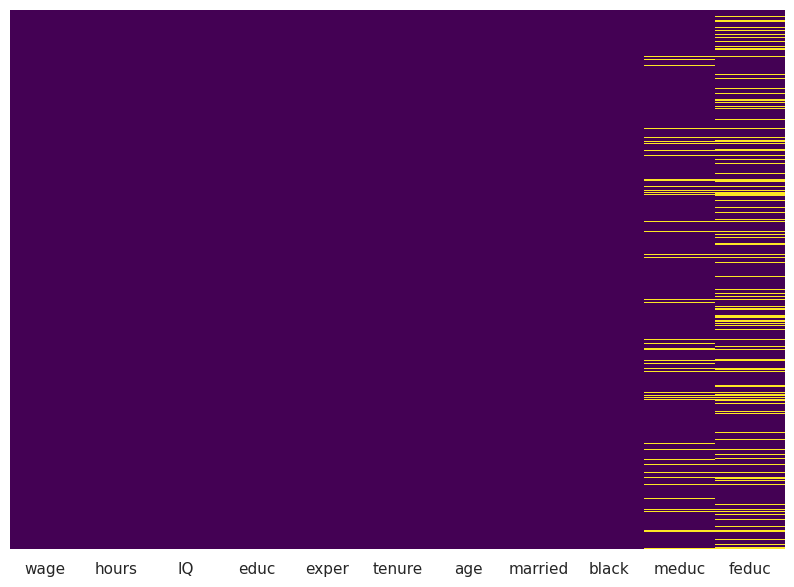

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

1. Because the number of NAs in feduc and meduc is greater that 5% of the observations, we should not keep them in the regression model. Alternatively we could do an imputation.

2. Here, let's drop the father education and impute the mother education.

In [28]:
df.drop('feduc', axis=1, inplace=True) #why do we need inplace? inplace=True: This parameter determines whether the modifications should be applied to the DataFrame in
#place or if a new DataFrame should be returned with the modifications. When inplace=True,
# the operation modifies the DataFrame in place, meaning the original DataFrame is changed, and
#the method does not return anything.

In [29]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

* we will replace the missing meduc with median. since the data is left skewed, mean is not a good representation of the central tendency measure.

In [30]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 60.6 KB


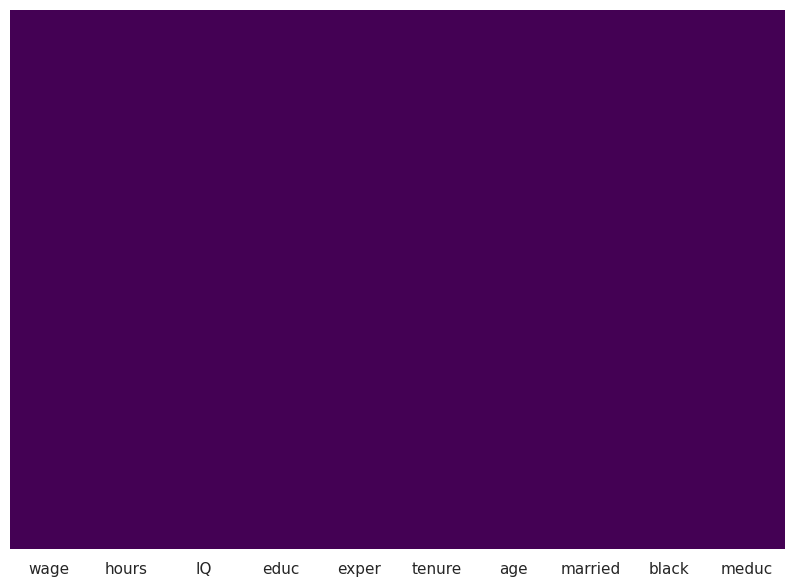

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### Save the data set:
Most commonly, the data sets are saved in a flat csv file but, here we will be saving our pre-processed data set into a Python pickle file because of the following reasons:

1. **Preservation of data types**: When saving data in a CSV file, all data is saved as strings, which can lead to data loss or inaccuracies if the data contains non-string types like integers or floats. Pickle, on the other hand, preserves the data types of the objects being saved, which means that the data can be reloaded exactly as it was saved.

2. **Handling of complex data structures**: CSV is a simple format that is best suited for storing simple data tables with rows and columns. Pickle, on the other hand, can handle more complex data structures like lists, dictionaries, and custom classes. So it's more versatile when it comes to handling different types of data.

3. **Efficiency**: Pickle is a binary format, which means that it is more efficient in terms of storage and loading time. CSV files are text files and are larger in size and take longer to read and write.


In [32]:
df.to_pickle("wage_clean.pkl")

### Data visualization

<ipython-input-33-b32a3bb8c80f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wage'], bins=30 , rug=True)


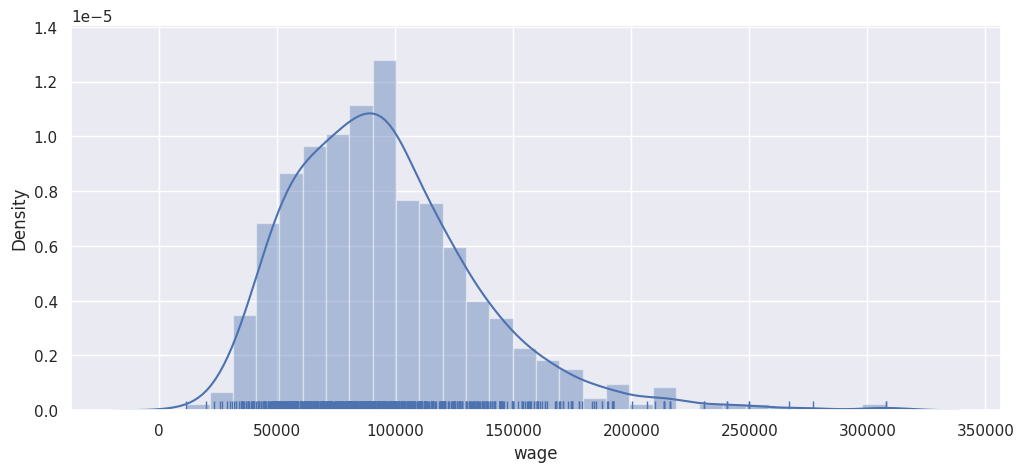

In [33]:
plt.figure(figsize=(12,5))
sns.distplot(df['wage'], bins=30 , rug=True)
plt.show()

**Challenge**: Can you replicate the follwoing histplot?

<ipython-input-35-6be450a560a3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['married'] == 0]['wage'], label='not married', bins=30, rug=True)
<ipython-input-35-6be450a560a3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['married'] == 1]['wage'], label='married', bins=30, rug=

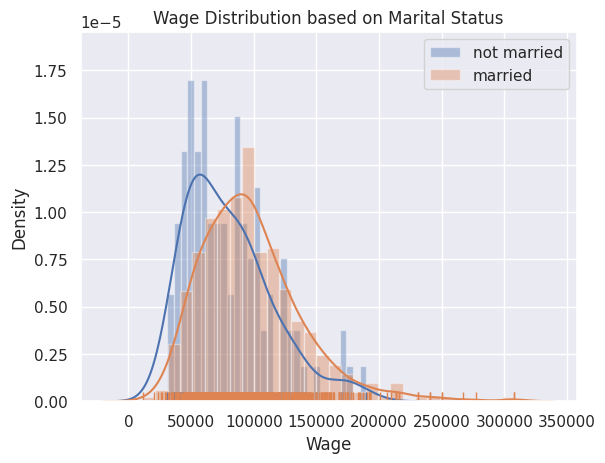

In [35]:

import seaborn as sns
import matplotlib.pyplot as plt


# Plotting

sns.distplot(df[df['married'] == 0]['wage'], label='not married', bins=30, rug=True)
sns.distplot(df[df['married'] == 1]['wage'], label='married', bins=30, rug=True)
plt.title('Wage Distribution based on Marital Status')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.legend()
plt.show()



In [ ]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

<ipython-input-36-d41c100df1ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm',annot=True)


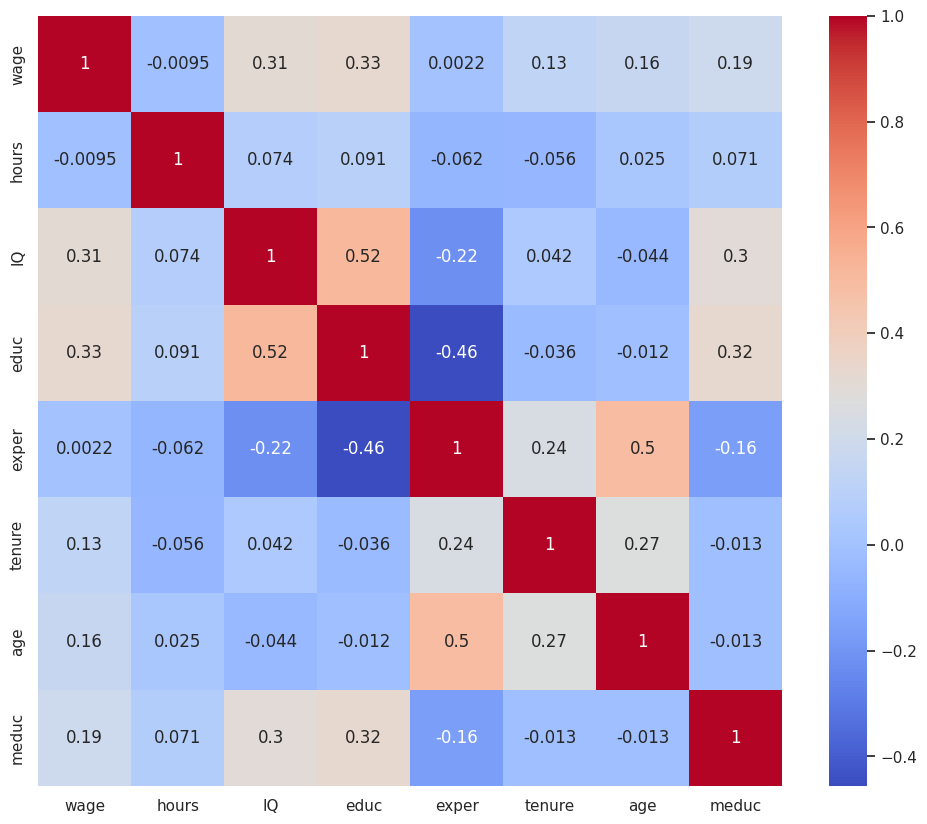

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

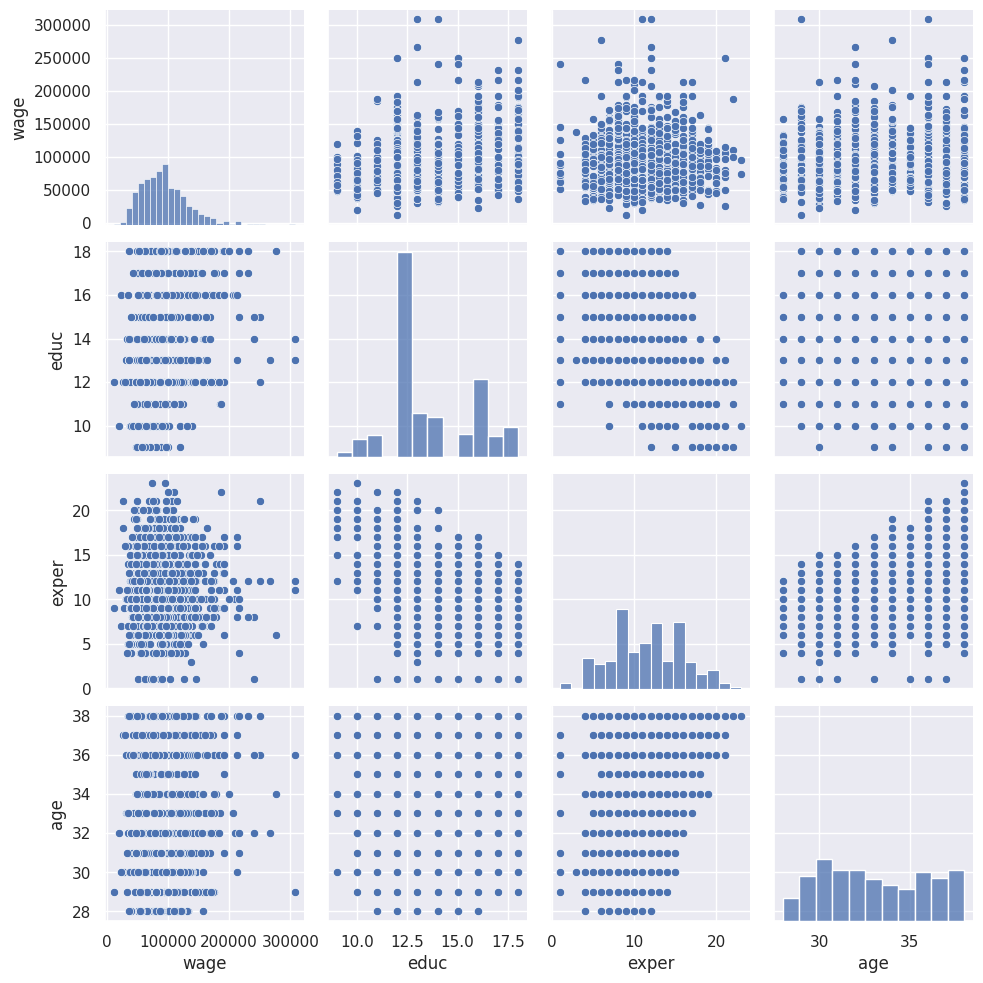

In [37]:
sns.pairplot(df, vars=['wage', 'educ','exper','age'])
plt.show()

### Exercise:
Try to plot the same pairplot for different categories of married vs non-married!

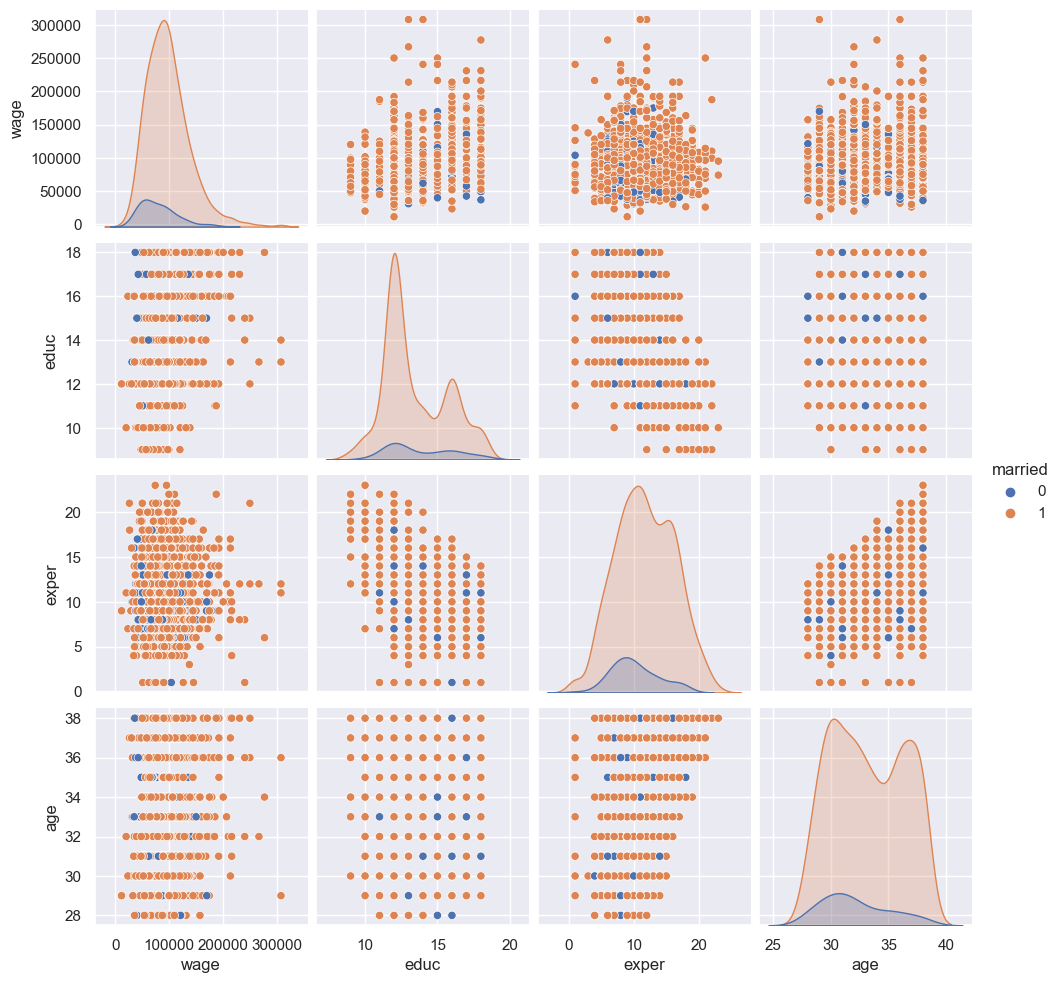

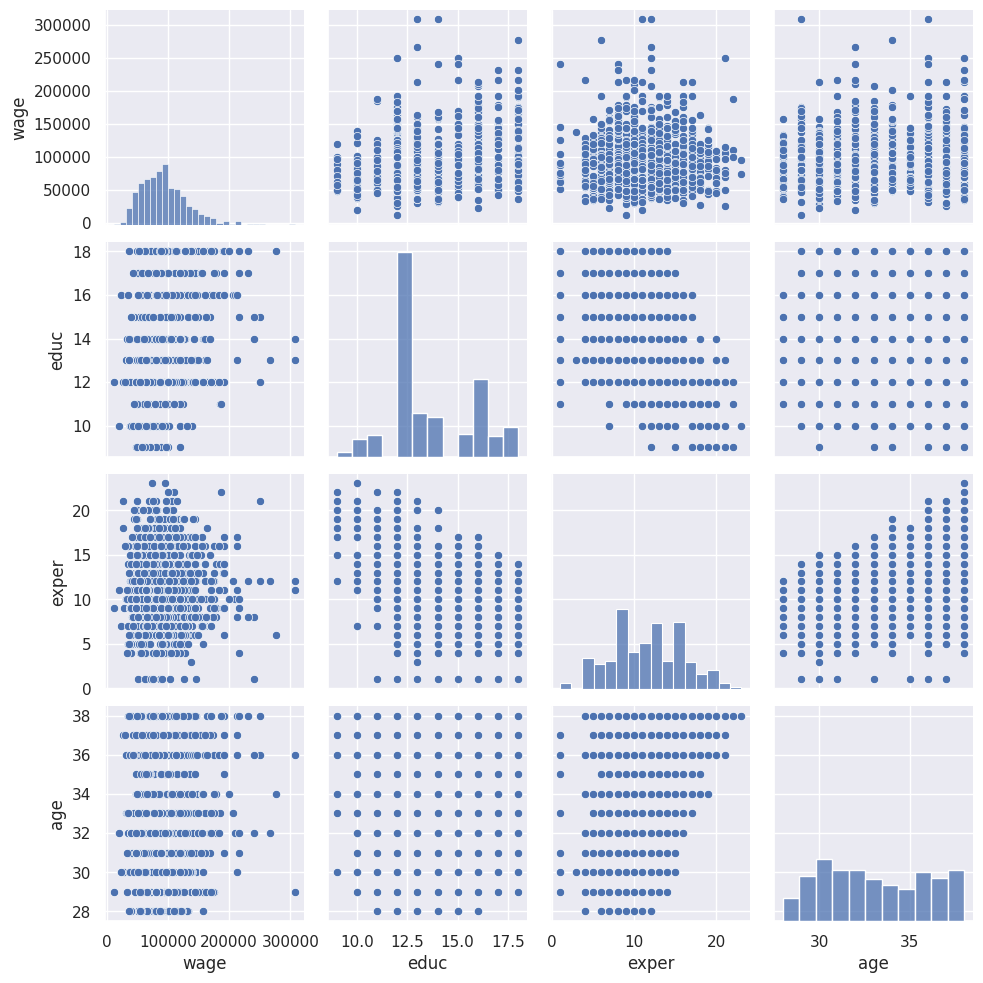

In [ ]:
sns.pairplot(df, vars=['wage', 'educ','exper','age'])
plt.show()

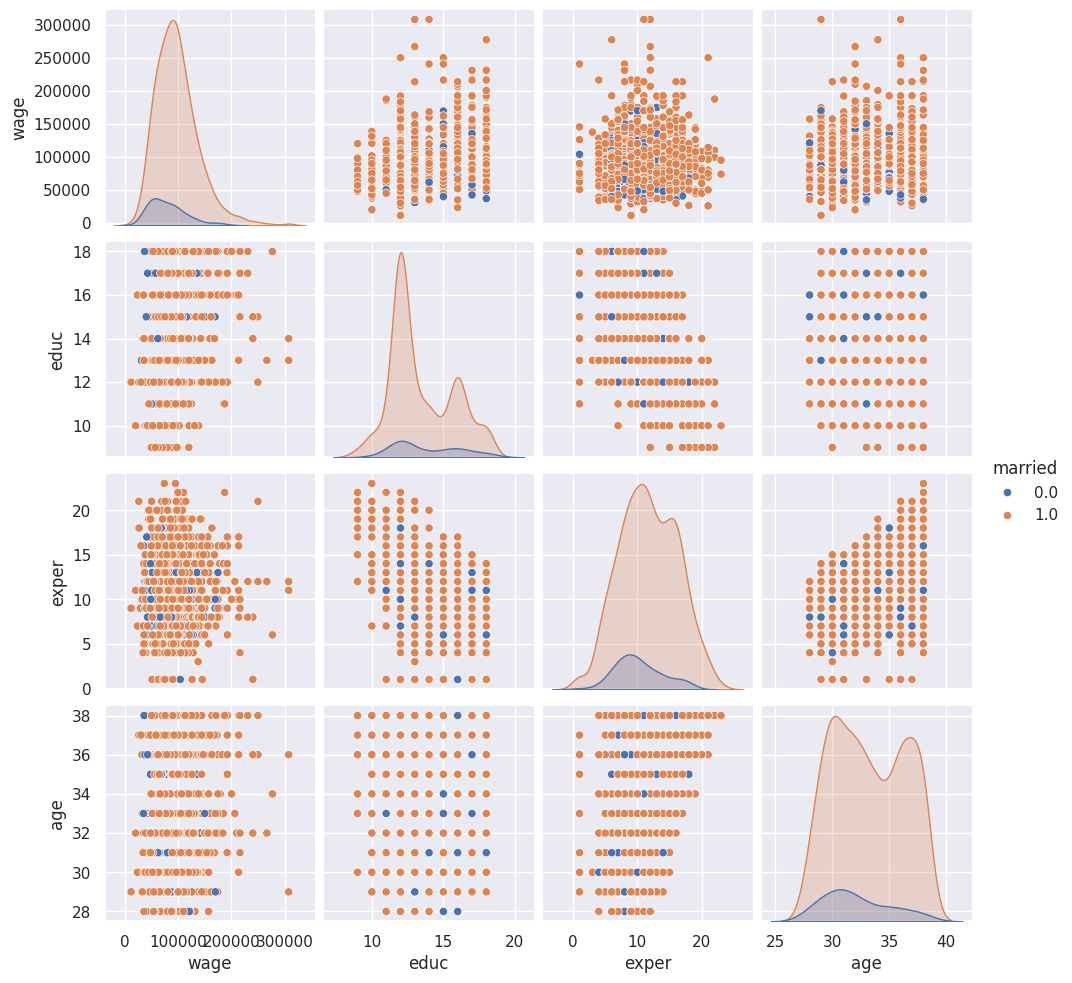

In [38]:
sns.pairplot(df, vars=['wage', 'educ','exper','age'], hue='married')
plt.show()

---

### Grouping the data based on different categories:

Let's summarize the data based on different categories using groupby() method and do some visualizations.
Is there a difference between the wages earned by married vs not married employees? between black and non black employees?

In [39]:
df.groupby(by='married').mean().round(1)

<ipython-input-39-941e13c1ca6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='married').mean().round(1)


,wage,hours,IQ,educ,exper,tenure,age,meduc
married,,,,,,,,
0.0,79844.0,43.2,101.9,13.8,10.2,6.2,32.1,11.0
1.0,97704.8,44.0,101.2,13.4,11.7,7.4,33.2,10.8


In [40]:
df.groupby(by=['married', 'black']).mean().round(1)

wage  hours     IQ  educ  exper  tenure   age  meduc
married black                                                          
0.0     0.0     84197.6   43.5  105.2  14.1    9.8     6.7  32.0   11.1
        1.0     60011.1   42.1   86.8  12.8   11.9     3.9  32.8   10.4
1.0     0.0    100728.0   44.3  103.3  13.6   11.7     7.5  33.3   11.0
        1.0     75979.4   41.9   85.9  12.4   12.2     6.6  32.8    9.3

In [41]:
df.groupby(by="married").agg({'wage':['count','mean','median', 'min','max'],
                            'educ':['mean']}).round(1)

wage                                       educ
        count     mean   median      min       max  mean
married                                                 
0.0       100  79844.0  73600.0  31000.0  189900.0  13.8
1.0       835  97704.8  92900.0  11500.0  307800.0  13.4

----

Now let's do some group plots:

In [42]:
df_group_married = df.groupby(by=['married']).mean().reset_index()
df_group_married

<ipython-input-42-495eaeec063b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_married = df.groupby(by=['married']).mean().reset_index()


,married,wage,hours,IQ,educ,exper,tenure,age,meduc
0,0.0,79844.000000,43.250000,101.920000,13.840000,10.220000,6.170000,32.12000,10.960000
1,1.0,97704.790419,44.010778,101.205988,13.423952,11.724551,7.361677,33.19521,10.772455


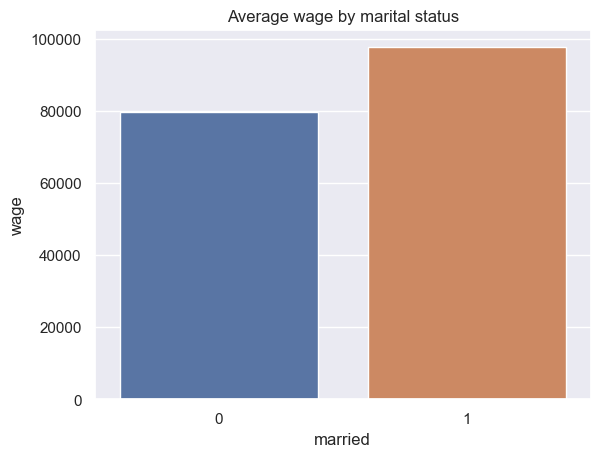

In [ ]:
sns.barplot(y='wage', x='married', data=df_group_married)
plt.title('Average wage by marital status')
plt.show()

**Challenge**: replicate the following chart!

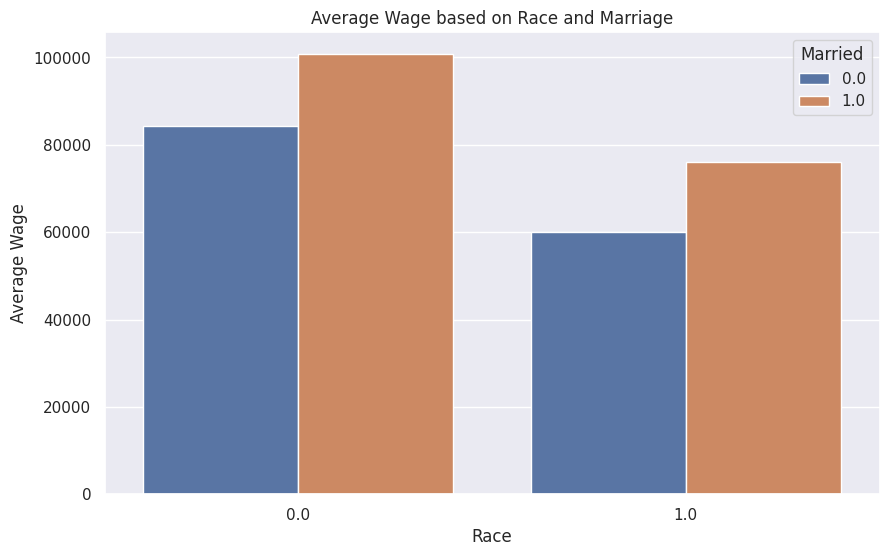

In [43]:


average_wage = df.groupby(['black', 'married'])['wage'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=average_wage, x='black', y='wage', hue='married')
plt.title('Average Wage based on Race and Marriage')
plt.xlabel('Race')
plt.ylabel('Average Wage')
plt.legend(title='Married', loc='upper right')
plt.show()


### Handling Dummy variables
This is not part of the EDA. We are going to use it later in the course.

In [ ]:
df_dummy= pd.get_dummies(df, drop_first=True)
df_dummy.head()

,wage,hours,IQ,educ,exper,tenure,age,meduc,married_1,black_1
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,8.0,1,0
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,14.0,1,0
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,14.0,1,0
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,12.0,1,0
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,6.0,1,0


in this example, since black and married are already dummy variables, we didn't need to do this.

### links:
1. What is EDA, Exploratory data analysis? https://en.wikipedia.org/wiki/Exploratory_data_analysis)
2. Python auto-visualization packages for EDA: https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae